In [122]:
import torch
torch.__version__

'2.9.1+cpu'

In [123]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data", path="loan_data.csv")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Sadha\.cache\kagglehub\datasets\taweilo\loan-approval-classification-data\versions\1\loan_data.csv


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [125]:
df = pd.read_csv(path)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [126]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [127]:
df.duplicated().sum()

np.int64(0)

In [128]:
# find the rows having missing values

(
    df.loc[
        (df.isna().any(axis=1)), :
    ]
)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [129]:
# duplicate rows

(
    df
    .loc[
        df.duplicated(keep=False), :
    ]
    
)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [130]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [131]:
#Seperate the numerical and categorical data
numerical_data = df.select_dtypes(include=np.number)
categorical_data = df.select_dtypes(exclude=np.number)


In [132]:
numerical_data

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


In [133]:
# statistical summary for numerical data

numerical_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [134]:
categorical_data.describe()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [135]:
num_col = numerical_data.columns[0:-1]
num_col.dtype #arrary

dtype('O')

In [136]:
num_col = numerical_data.columns[0:-1].to_list()
type(num_col)
#List
num_col

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [137]:
from matplotlib.gridspec import GridSpec

In [138]:
def plot_for_num_cols(numerical_col):
    plt.Figure(figsize=(12,4))
    grid = GridSpec(nrows=1,ncols=4)
    #set the axes
    #boxplot
    ax1 = plt.subplot(grid[:,0])
    #histogram
    ax2 = plt.subplot(grid[:,1:3])
    #violin plot
    ax3 = plt.subplot(grid[:,3])

    # create boxplot
    sns.boxplot(data=df,y=numerical_col,ax = ax1)
    #create histogram
    sns.histplot(data=df,x=numerical_col,ax=ax2)
    #Create violin plot
    sns.violinplot(data = df,y=numerical_col,ax=ax3)
    plt.tight_layout()
    plt.show()
    


PERSON_AGE


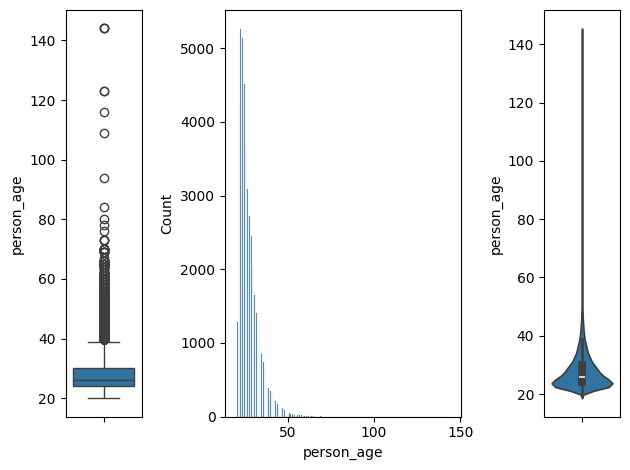


PERSON_INCOME


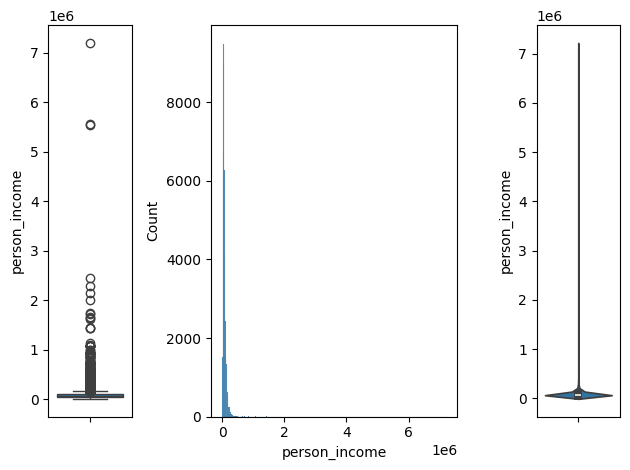


PERSON_EMP_EXP


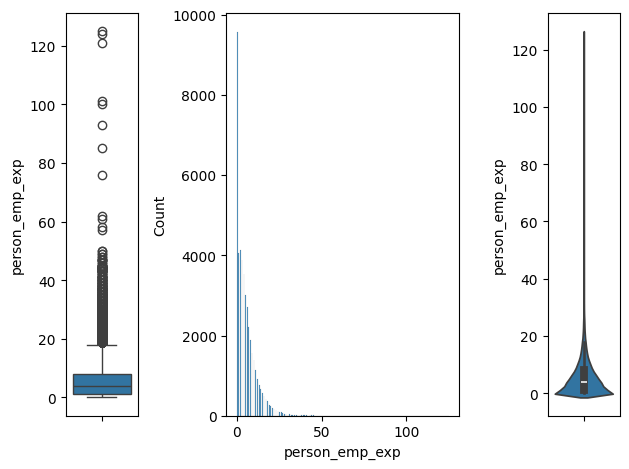


LOAN_AMNT


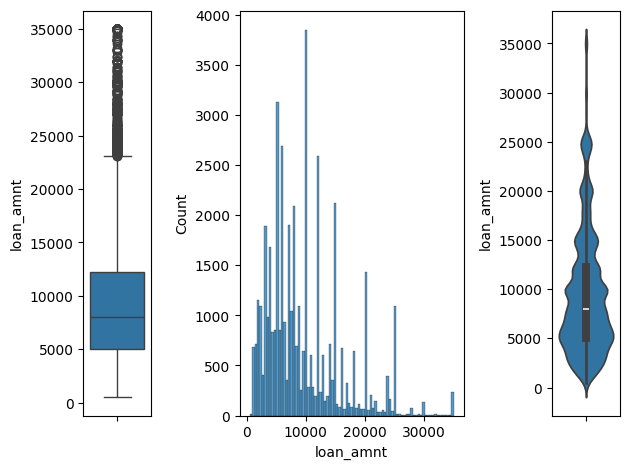


LOAN_INT_RATE


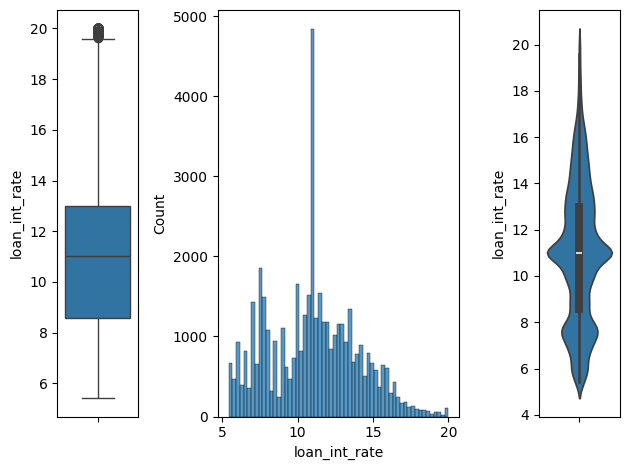


LOAN_PERCENT_INCOME


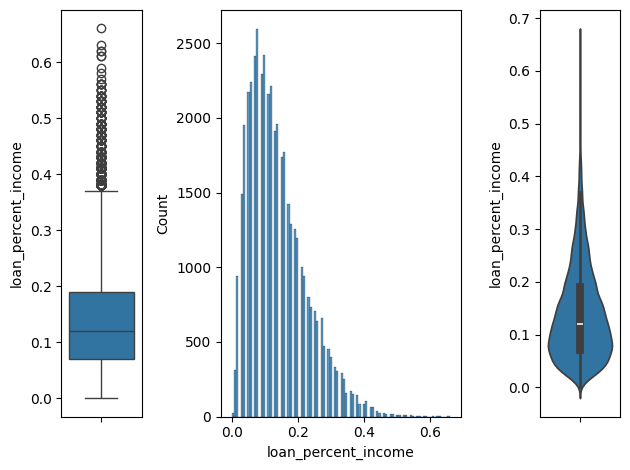


CB_PERSON_CRED_HIST_LENGTH


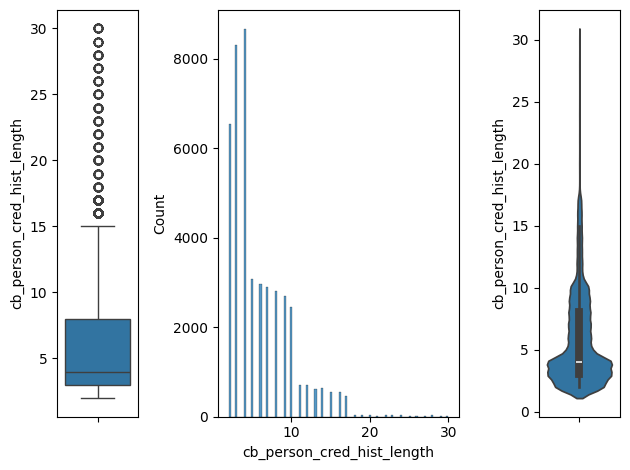


CREDIT_SCORE


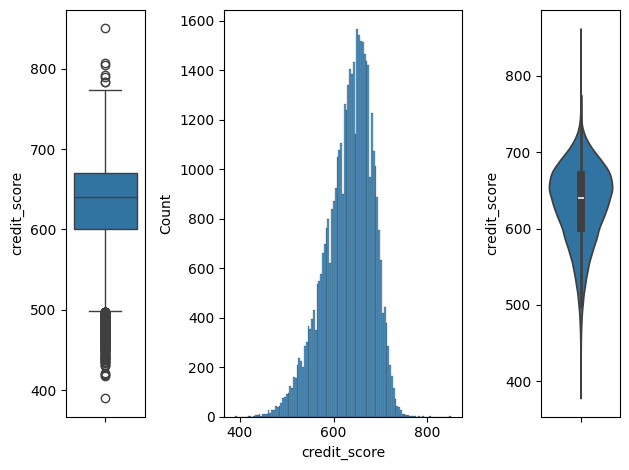

In [139]:
for col in num_col:
    print(f"{col.upper()}")
    plot_for_num_cols(col)
    print()

In [140]:
def plot_for_cat_cols(column_name):
    print(f"Number of unique values in {column_name} : {df[column_name].nunique()}",end = "\n\n")
    print(f"Number of unique values in {column_name} : {df[column_name].unique()}",end = "\n\n")
    display(df[column_name].value_counts(normalize = True))
    sns.countplot(data=df,x=column_name)
    plt.show()

In [141]:
cat_cols = categorical_data.columns.to_list() + numerical_data.columns[[-1]].to_list()
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file',
 'loan_status']

In [142]:
numerical_data.columns[[-1]].to_list()

['loan_status']

Number of unique values in person_gender : 2

Number of unique values in person_gender : ['female' 'male']



person_gender
male      0.552022
female    0.447978
Name: proportion, dtype: float64

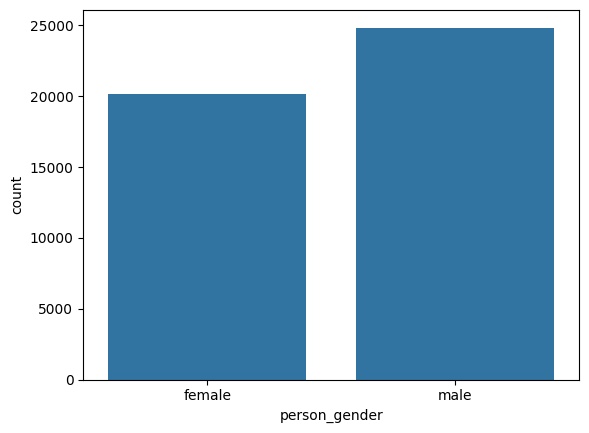

Number of unique values in person_education : 5

Number of unique values in person_education : ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']



person_education
Bachelor       0.297756
Associate      0.267289
High School    0.266044
Master         0.155111
Doctorate      0.013800
Name: proportion, dtype: float64

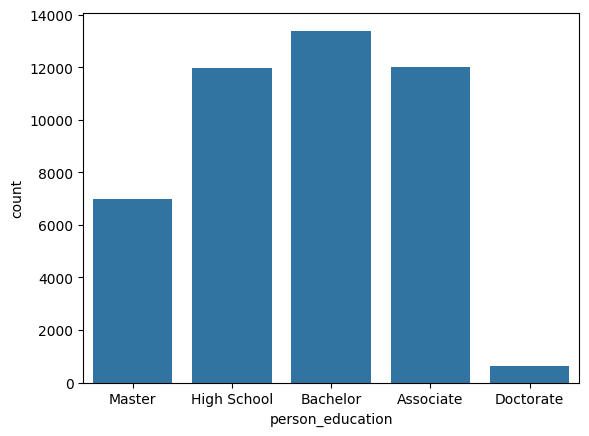

Number of unique values in person_home_ownership : 4

Number of unique values in person_home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']



person_home_ownership
RENT        0.520956
MORTGAGE    0.410867
OWN         0.065578
OTHER       0.002600
Name: proportion, dtype: float64

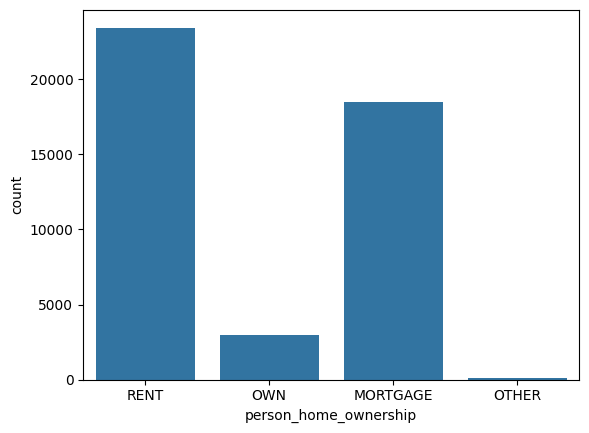

Number of unique values in loan_intent : 6

Number of unique values in loan_intent : ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']



loan_intent
EDUCATION            0.203400
MEDICAL              0.189956
VENTURE              0.173756
PERSONAL             0.167822
DEBTCONSOLIDATION    0.158778
HOMEIMPROVEMENT      0.106289
Name: proportion, dtype: float64

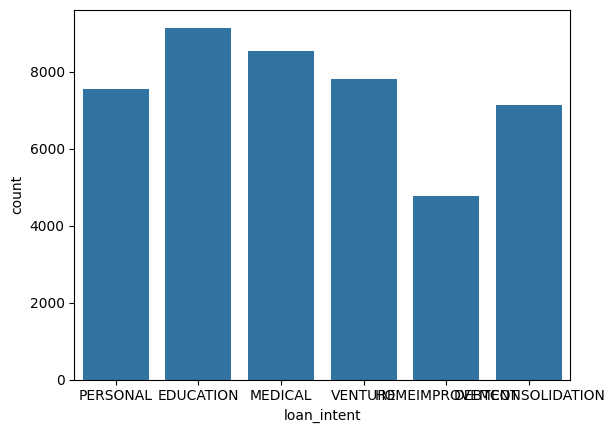

Number of unique values in previous_loan_defaults_on_file : 2

Number of unique values in previous_loan_defaults_on_file : ['No' 'Yes']



previous_loan_defaults_on_file
Yes    0.507956
No     0.492044
Name: proportion, dtype: float64

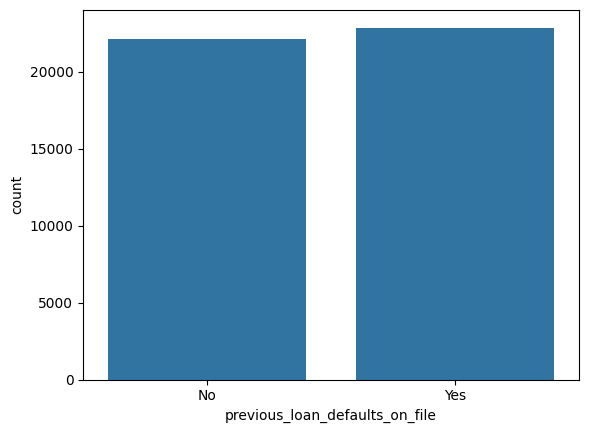

Number of unique values in loan_status : 2

Number of unique values in loan_status : [1 0]



loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

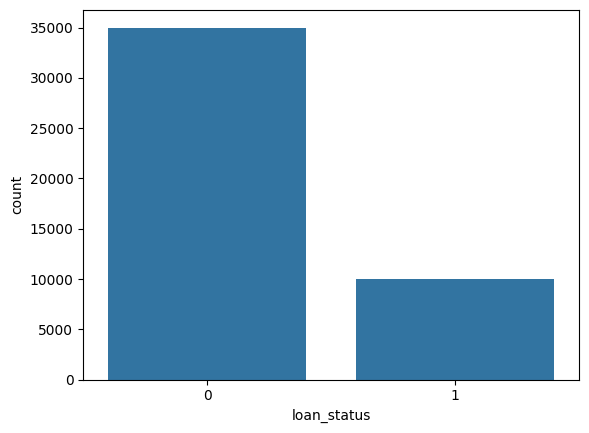

In [143]:
for col in cat_cols:
    plot_for_cat_cols(col)

## FE

In [144]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split

In [145]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [146]:
#make X and y
X,y = df.drop(columns=["loan_status"]),df["loan_status"]

In [147]:
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No


In [148]:
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [149]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,shuffle=True,stratify=y)
print("Shape of training data is :",X_train.shape)
print("Shape of training data is :",X_test.shape)

Shape of training data is : (36000, 13)
Shape of training data is : (9000, 13)


In [150]:
num_col

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [151]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file',
 'loan_status']

In [152]:
cat_cols.pop(-1)

'loan_status'

In [153]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [154]:
from sklearn.pipeline import Pipeline

In [155]:
#Pipeliene for numerical column
#1.Outlier Capping
#2. Scaling --> Robustscaler

num_pipe = Pipeline(steps=[
    ("outlier",Winsorizer(capping_method='iqr',tail="both",fold = 1.5)),
    ("scaling" , RobustScaler())
])
num_pipe

,steps,"[('outlier', ...), ('scaling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,capping_method,'iqr'
,tail,'both'
,fold,1.5
,add_indicators,False
,variables,None
,missing_values,'raise'
,with_centering,True


In [156]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [157]:
cat_cols.pop(1)

'person_education'

In [158]:
ohe_col = cat_cols

In [159]:
order_of_education = [ "High School","Associate","Bachelor","Master","Doctorate"]

In [160]:
# Transformer object
#1.OHE
#2.Num pipe
# Ordinal Encde - Education

Preprosessor = ColumnTransformer(transformers=[
    ("num_pipe",num_pipe,num_col),
    ("OHE",OneHotEncoder(drop="first",handle_unknown="ignore"),ohe_col),
    ("ordinal",OrdinalEncoder(categories=[order_of_education],handle_unknown="use_encoded_value",unknown_value=-1),["person_education"])
],remainder="passthrough",n_jobs=-1,verbose_feature_names_out=False)
Preprosessor

,transformers,"[('num_pipe', ...), ('OHE', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,capping_method,'iqr'
,tail,'both'
,fold,1.5


In [161]:
Preprosessor.fit_transform(X_train)

array([[-0.33333333, -0.16634333, -0.28571429, ...,  1.        ,
         1.        ,  3.        ],
       [-0.5       , -0.43195902, -0.28571429, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.5       ,  2.09432555,  0.42857143, ...,  1.        ,
         1.        ,  3.        ],
       ...,
       [ 0.66666667,  0.11619795,  0.71428571, ...,  0.        ,
         1.        ,  2.        ],
       [ 0.66666667, -0.55913519,  0.57142857, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.16666667, -0.36995962,  0.14285714, ...,  0.        ,
         0.        ,  3.        ]], shape=(36000, 19))

In [162]:
X_train = Preprosessor.fit_transform(X_train)
X_test = Preprosessor.transform(X_test)

In [163]:
X_train

array([[-0.33333333, -0.16634333, -0.28571429, ...,  1.        ,
         1.        ,  3.        ],
       [-0.5       , -0.43195902, -0.28571429, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.5       ,  2.09432555,  0.42857143, ...,  1.        ,
         1.        ,  3.        ],
       ...,
       [ 0.66666667,  0.11619795,  0.71428571, ...,  0.        ,
         1.        ,  2.        ],
       [ 0.66666667, -0.55913519,  0.57142857, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.16666667, -0.36995962,  0.14285714, ...,  0.        ,
         0.        ,  3.        ]], shape=(36000, 19))

In [164]:
#List of feature name
feature_names = Preprosessor.get_feature_names_out()
feature_names

array(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'person_gender_male',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes', 'person_education'],
      dtype=object)

In [165]:
feature_names.shape

(19,)

## Model Building

In [166]:
import torch
from torch.utils.data import DataLoader,Dataset
import torch.nn as nn

## Build the Dataset

In [167]:
# create a Dataset class

class LoanDataset(Dataset):
    
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).to(torch.float32)
        self.y = torch.from_numpy(y.values).to(torch.float)
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        row, label = self.X[idx], self.y[idx]
        return row, label

In [168]:
temp_dataset = LoanDataset(X_train[:10],y_train.iloc[:10])
temp_dataset

In [169]:
len(temp_dataset)

10

In [170]:
temp_dataset[0]

(tensor([-0.3333, -0.1663, -0.2857, -0.4976, -1.1325, -0.4167,  0.0000,  0.2353,
          1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  1.0000,  3.0000]),
 tensor(0.))

In [171]:
X_train[0],y_train.iloc[0]

(array([-0.33333333, -0.16634333, -0.28571429, -0.4975812 , -1.13254371,
        -0.41666667,  0.        ,  0.23529412,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  3.        ]),
 np.int64(0))

In [172]:
# define the datasets
train_dataset = LoanDataset(X_train, y_train)
test_dataset = LoanDataset(X_test, y_test)

In [173]:
# define the dataloader

train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=32,
                             shuffle=False)

In [174]:
train_dataloader

In [175]:
for batch_feature,batch_label in train_dataloader:
    print(batch_feature)
    print(batch_feature.shape)
    print(batch_label)
    print(batch_label.shape)
    break



tensor([[ 0.0000,  0.6294,  0.2857,  0.3801, -0.5685, -0.0833, -0.4000, -0.1324,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  2.0000],
        [ 0.0000, -0.2691, -0.4286, -0.4699,  0.6723, -0.2500,  0.0000, -0.1765,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [-0.5000, -0.3718, -0.4286,  0.5529, -0.2549,  1.0833, -0.4000,  0.3824,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  2.0000],
        [ 0.0000, -0.6129,  0.2857,  0.9675,  0.0767,  2.0833, -0.4000, -0.1029,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 2.1667,  0.2409,  2.0000,  0.2764, -0.0609,  0.0833,  1.8000, -0.4412,
          1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
     

## Model Architecture

In [176]:
# create the model

class MyModel(nn.Module):
    
    def __init__(self, num_features):
        super().__init__()
        
        self.network = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()           
        )
        
    def forward(self, X):
        predictions = self.network(X)
        return predictions


In [177]:
# define the model

model = MyModel(num_features=X_train.shape[1])

In [186]:
#Set the epoch and learning rat
epoch =10
lr = 0.001


In [187]:
from torch.optim import Adam
optimizer = Adam(params=model.parameters(),lr=lr)


In [190]:
loss_fn = nn.BCELoss()

In [188]:
len(train_dataloader)

1125

In [191]:
train_batches = len(train_dataloader)
test_batches = len(test_dataloader)

In [192]:
for batch_features_train, batch_labels_train in train_dataloader:
    print("Input: ", batch_features_train.shape) 
    # forward pass
    y_pred_train = model(batch_features_train)
    print("Predictions: ", y_pred_train.shape)
    print(y_pred_train[0:3])
    print("Labels: ", batch_labels_train.unsqueeze(1).shape)
    break

Input:  torch.Size([32, 19])
Predictions:  torch.Size([32, 1])
tensor([[2.0448e-04],
        [3.0870e-19],
        [3.6868e-07]], grad_fn=<SliceBackward0>)
Labels:  torch.Size([32, 1])


In [193]:
# training loop

train_batches = len(train_dataloader)
test_batches = len(test_dataloader)

# iterate over all the epochs
for epoch in range(1, epoch+1):
    train_loss = 0
    test_loss = 0
    
    # iterate over the batches of training data
    for batch_features_train, batch_labels_train in train_dataloader:
        
        # forward pass
        y_pred_train = model(batch_features_train)
        
        # calculate the loss
        batch_loss_train = loss_fn(y_pred_train, batch_labels_train.unsqueeze(1))
        
        # clear the gradients
        optimizer.zero_grad()
        
        # calculate the gradients using backprop
        batch_loss_train.backward()
        
        # update the model parameters
        optimizer.step()
        
        # add batch loss to epoch loss
        train_loss += batch_loss_train.item()
        
    # iterate over the batches of test data
    for batch_features_test, batch_labels_test in test_dataloader:
        with torch.no_grad():
            # forward pass
            y_pred_test = model(batch_features_test)
            
            # calculate the loss
            batch_loss_test = loss_fn(y_pred_test, batch_labels_test.unsqueeze(1))
            
            # add batch loss to epoch loss
            test_loss += batch_loss_test.item()
            
    avg_train_loss = train_loss / train_batches
    avg_test_loss = test_loss / test_batches
    
    print(f"Epoch: {epoch}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}")
        

Epoch: 1, Train Loss: 0.14432604775163863, Test Loss: 0.20893873253189926
Epoch: 2, Train Loss: 0.1420147247256504, Test Loss: 0.21411460842805127
Epoch: 3, Train Loss: 0.1434176213302546, Test Loss: 0.2119502492830263
Epoch: 4, Train Loss: 0.14017502535217338, Test Loss: 0.2160105152742554
Epoch: 5, Train Loss: 0.13994597278493973, Test Loss: 0.21733229660184672
Epoch: 6, Train Loss: 0.1389122493225667, Test Loss: 0.22530129782406363
Epoch: 7, Train Loss: 0.13819547472645838, Test Loss: 0.23106909004297663
Epoch: 8, Train Loss: 0.13887273120714558, Test Loss: 0.22164165840239813
Epoch: 9, Train Loss: 0.13864438870383633, Test Loss: 0.2188063235094784
Epoch: 10, Train Loss: 0.1373915202534861, Test Loss: 0.22291122900044663


In [194]:

from sklearn.metrics import classification_report

In [195]:
# model to be set to eval mode

model.eval()

MyModel(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [196]:
# define the dataloader

train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=32,
                              shuffle=False)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=32,
                             shuffle=False)

In [197]:
# calculate the predictions on training data

train_predictions = []

for batch_features, batch_labels in train_dataloader:
    with torch.no_grad():
        y_pred = model(batch_features).squeeze(1).numpy()
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        train_predictions.extend(y_pred)
        
 
y_pred_train = np.array(train_predictions)   

In [198]:
y_pred_train.shape, y_train.shape

((36000,), (36000,))

In [199]:
# calculate the predictions on test data

test_predictions = []

for batch_features, batch_labels in test_dataloader:
    with torch.no_grad():
        y_pred = model(batch_features).squeeze(1).numpy()
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        test_predictions.extend(y_pred)
        
 
y_pred_test = np.array(test_predictions)  

In [200]:

y_pred_test.shape, y_test.shape

((9000,), (9000,))

In [201]:
# classifictaion report for training data

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28000
           1       0.89      0.89      0.89      8000

    accuracy                           0.95     36000
   macro avg       0.93      0.93      0.93     36000
weighted avg       0.95      0.95      0.95     36000



In [202]:
# classifictaion report for testdata

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7000
           1       0.79      0.80      0.79      2000

    accuracy                           0.91      9000
   macro avg       0.87      0.87      0.87      9000
weighted avg       0.91      0.91      0.91      9000



## SHAP

In [ ]:
#Create explainer for background values
import shap


In [205]:
X_train.shape,X_test.shape

((36000, 19), (9000, 19))

In [ ]:
np.random.choice(a=X_train.shape[0],size=500,replace=False)

In [207]:
np.random.choice(a=X_train.shape[0],size=500,replace=False).shape

(500,)

In [208]:
np.random.seed(42)

In [209]:
idx_values = np.random.choice(a=X_train.shape[0],size=500,replace=False)

In [ ]:
idx_values

In [211]:
#Create background sample data 
sample_background_data = X_train[idx_values,:]

In [216]:
sample_background_data.shape
background_data = torch.tensor(sample_background_data,dtype=torch.float32)


In [217]:

explainer = shap.DeepExplainer(model =model,data = background_data)

In [ ]:
#expected value
explainer.expected_value

array([0.2658274], dtype=float32)

In [240]:
#batch of test data
n_rows =30
batch_value = np.random.choice(a=X_test.shape[0],size=n_rows,replace=False)
x_test_batch = X_test[batch_value,:]

In [241]:
x_test_batch.shape

(30, 19)

In [242]:
#Create the batch data in tensor as explainer takes tensor values
x_test_values = torch.tensor(x_test_batch,dtype=torch.float32)

In [243]:
#calculate the shap values
shap_values = explainer(x_test_values)

In [244]:
shap_values

.values =
array([[[ 1.68903004e-02],
        [-3.82112898e-02],
        [ 6.95279101e-03],
        [-1.01300050e-03],
        [ 1.40773773e-01],
        [ 9.70893353e-03],
        [-1.63341258e-02],
        [-2.07233056e-02],
        [ 5.09353019e-02],
        [ 2.41290982e-04],
        [ 1.43175600e-02],
        [-5.02073504e-02],
        [ 4.32213731e-02],
        [ 1.66460518e-02],
        [ 8.93819705e-03],
        [-9.57354903e-02],
        [ 3.69535908e-02],
        [ 2.94003874e-01],
        [ 1.74712334e-02]],

       [[-1.73775237e-02],
        [-8.40684474e-02],
        [-2.43427837e-03],
        [-9.89540666e-03],
        [-4.63658534e-02],
        [-5.47442548e-02],
        [ 1.44899832e-02],
        [-3.67813301e-03],
        [ 2.24118424e-03],
        [-4.68155602e-04],
        [ 3.72759835e-03],
        [-5.37875062e-03],
        [ 4.25095251e-03],
        [ 2.48282391e-04],
        [-1.10939855e-03],
        [ 7.25792302e-03],
        [ 1.07598314e-02],
        [ 5.6872

In [245]:
#Shape of shap values
shap_values.shape

(30, 19, 1)

In [246]:
shap_values= shap_values[:,:,0]

In [247]:
shap_values

.values =
array([[ 1.68903004e-02, -3.82112898e-02,  6.95279101e-03,
        -1.01300050e-03,  1.40773773e-01,  9.70893353e-03,
        -1.63341258e-02, -2.07233056e-02,  5.09353019e-02,
         2.41290982e-04,  1.43175600e-02, -5.02073504e-02,
         4.32213731e-02,  1.66460518e-02,  8.93819705e-03,
        -9.57354903e-02,  3.69535908e-02,  2.94003874e-01,
         1.74712334e-02],
       [-1.73775237e-02, -8.40684474e-02, -2.43427837e-03,
        -9.89540666e-03, -4.63658534e-02, -5.47442548e-02,
         1.44899832e-02, -3.67813301e-03,  2.24118424e-03,
        -4.68155602e-04,  3.72759835e-03, -5.37875062e-03,
         4.25095251e-03,  2.48282391e-04, -1.10939855e-03,
         7.25792302e-03,  1.07598314e-02,  5.68724908e-02,
        -2.54926831e-02],
       [ 2.12210957e-02, -6.76133931e-02,  1.07532693e-02,
         1.51639074e-01,  1.66871369e-01,  6.76618377e-03,
        -3.15639051e-03, -3.44720148e-02,  2.84008612e-03,
         6.36021723e-04,  1.57703236e-02, -3.52363735

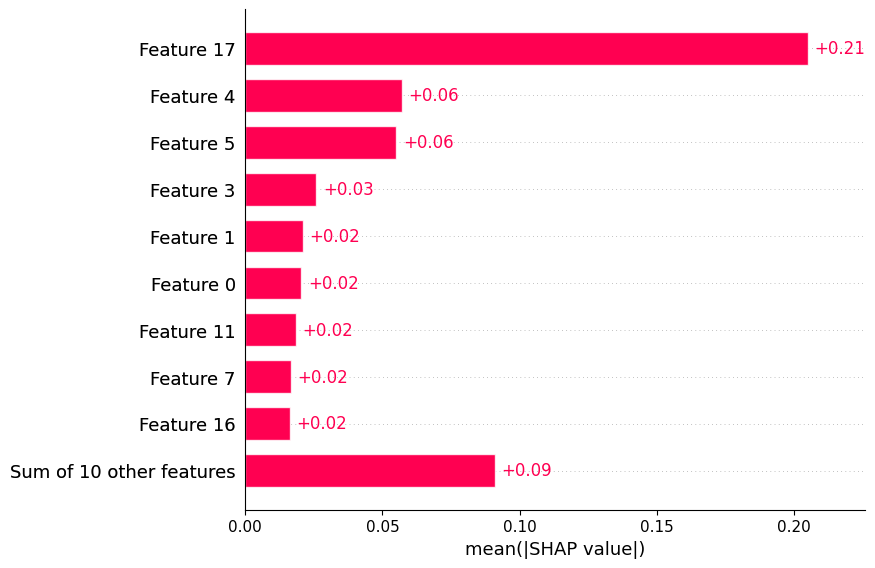

In [248]:
#barplot
shap.plots.bar(shap_values)

In [249]:
shap_values.shape

(30, 19)

In [252]:
shap_values[0,:].shape

(19,)

In [255]:
print(shap_values.base_values)

None


In [259]:
base_value = explainer.expected_value

In [260]:
Preprosessor.get_feature_names_out()

array(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'person_gender_male',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes', 'person_education'],
      dtype=object)

In [263]:
#Make changes in Explination
shap_values = shap.Explanation(
    values=shap_values.values,
    base_values=base_value,
    data = x_test_batch,
    feature_names=Preprosessor.get_feature_names_out()

)
shap_values.base_values

array([0.2658274], dtype=float32)

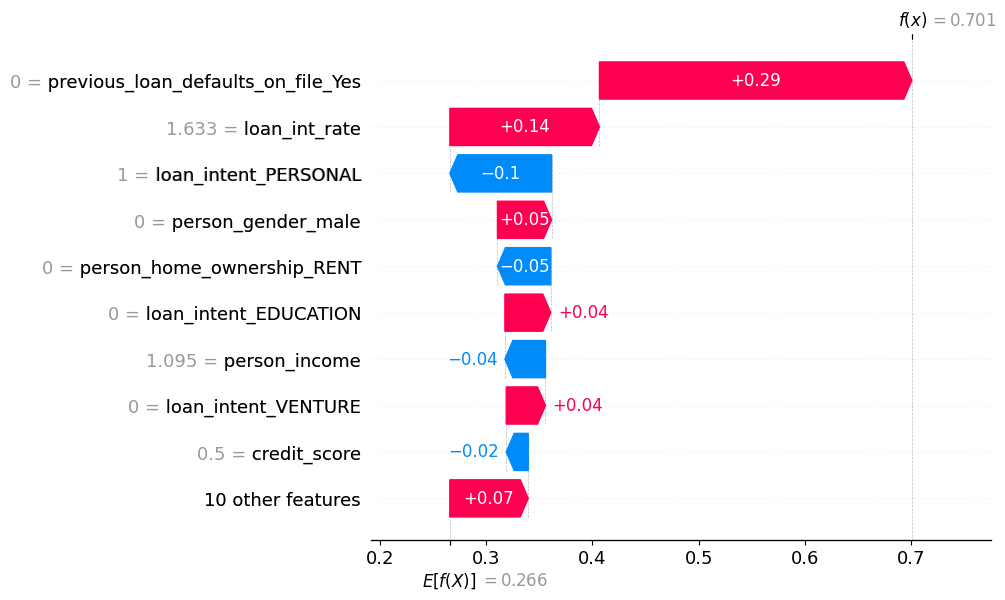

In [264]:
#watfall plot
shap.plots.waterfall(shap_values[0,:])

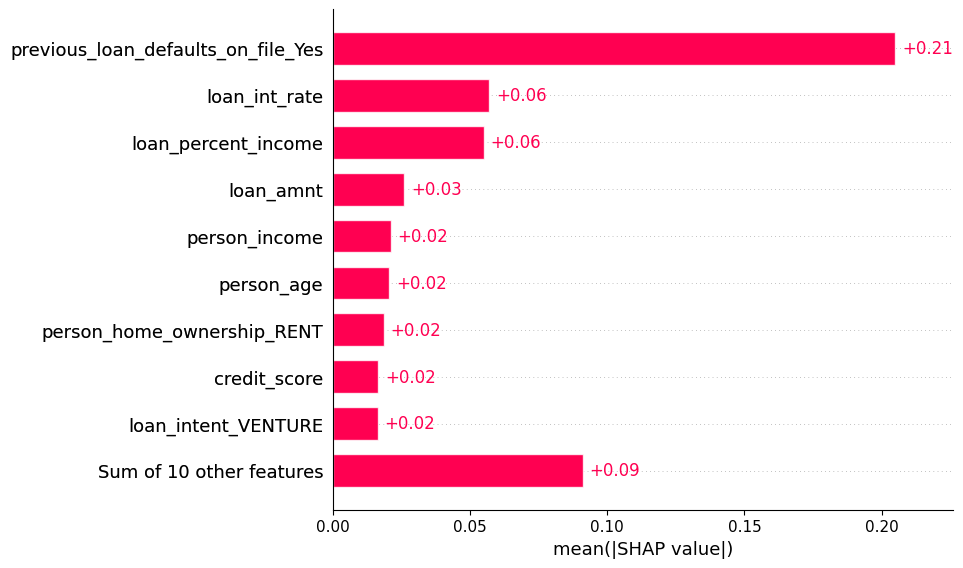

In [265]:
#barplot
shap.plots.bar(shap_values)

## Local Plots

In [266]:
row_shap_values = shap_values[0,:]
row_shap_values

.values =
array([ 1.68903004e-02, -3.82112898e-02,  6.95279101e-03, -1.01300050e-03,
        1.40773773e-01,  9.70893353e-03, -1.63341258e-02, -2.07233056e-02,
        5.09353019e-02,  2.41290982e-04,  1.43175600e-02, -5.02073504e-02,
        4.32213731e-02,  1.66460518e-02,  8.93819705e-03, -9.57354903e-02,
        3.69535908e-02,  2.94003874e-01,  1.74712334e-02])

.base_values =
np.float32(0.2658274)

.data =
array([ 0.16666667,  1.09458269,  0.14285714,  0.138217  ,  1.63338973,
       -0.41666667,  0.4       ,  0.5       ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  2.        ])

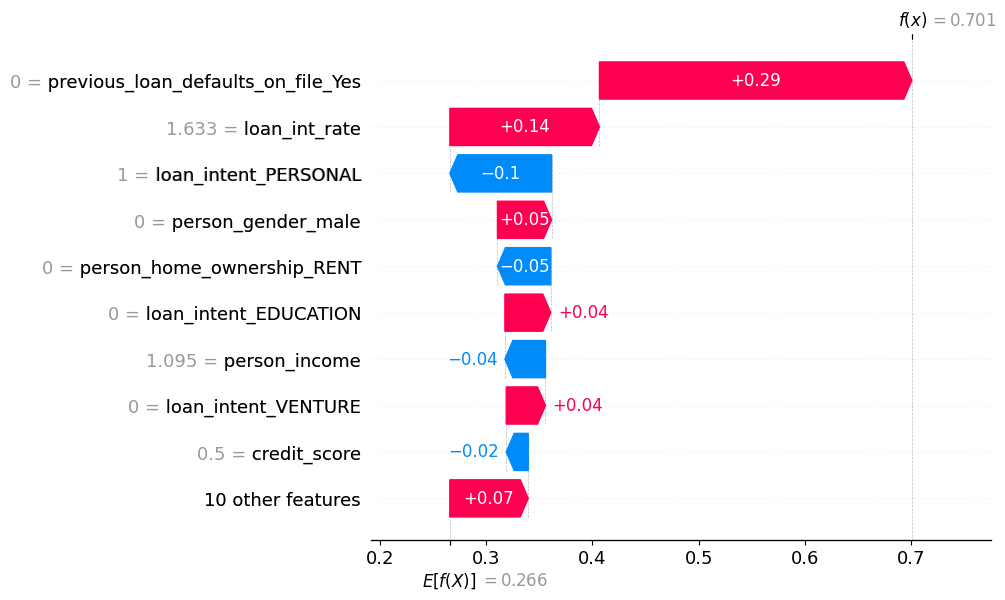

In [267]:
#Waterfall plot
shap.plots.waterfall(row_shap_values)

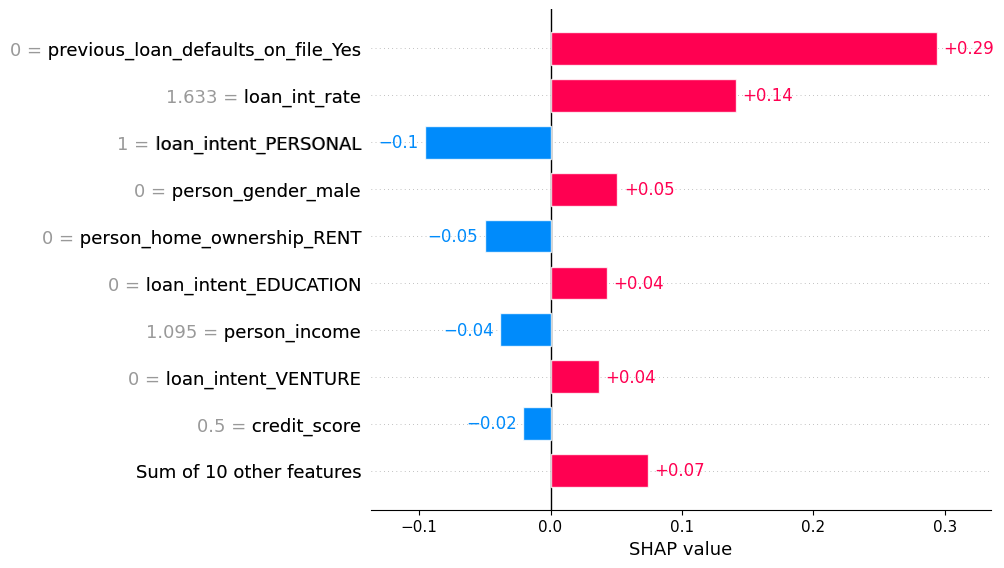

In [268]:
shap.plots.bar(row_shap_values)

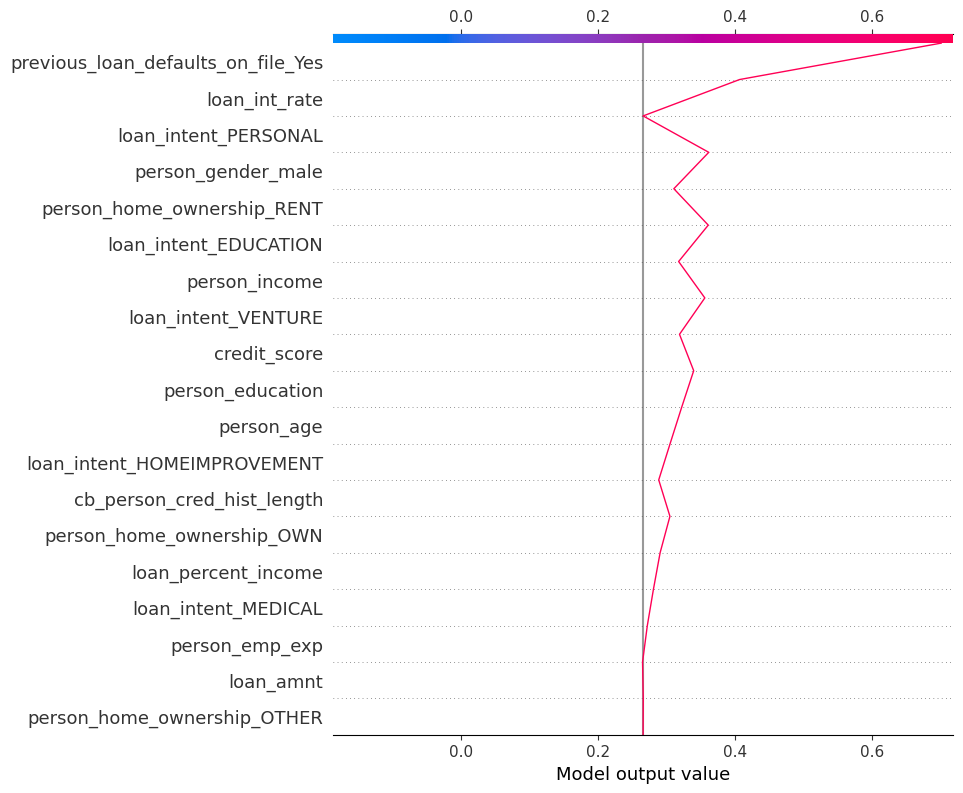

In [269]:
shap.plots.decision(shap_values= row_shap_values.values,base_value= base_value[0],
                    feature_names=Preprosessor.get_feature_names_out())